In [1]:
# импорт необходимых библиотек и настройка вывода
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# инициализация словаря со всеми этапами регистрации
def init_steps_dict(df):
    # создание пустого словаря
    stat = dict()
    # заполнение словаря ключами, соответствующими именам полей, с нулевыми значениями
    for str in df["ElementName"].unique():
        stat[str] = 0
    return stat

In [3]:
# Функция, определяющая выполненные пользователем шаги и заносящая их в словарь
def reg_steps(df, dictionary):
    for el_nam in df["ElementName"].unique():
        # при рассмотрении кнопки завершения регистрации важно именно её нажатие - завершение регистрации,
        # поэтому учитывается только клик. В остальных случаях можно оценивать косвенные признаки внимания
        # пользователей, например, простое наведение курсора
        if el_nam == 'кнопка завершить регистрацию':
            if len(df[(df["ElementName"] == el_nam) & (df["EventTypeID"] == 22)]) > 0:
                dictionary[el_nam] += 1
        else:
            dictionary[el_nam] += 1

In [4]:
# функция, собирающая сделанные шаги по всему датасету
def analyze_set(df):
    # инициализация пустого словаря (см. предыдущие функции)
    stat = init_steps_dict(df)
    # для каждой отдельной сессии собирается информация о шагах регистрации, совершённых пользователем
    for sess in df["Session"].unique():
        reg_steps(df[df["Session"] == sess], stat)
    return stat

In [5]:
# постобработка результатов
def post_prod(stat):
    # введение категории, учитывающей всех людей, указавших свой пол
    stat['пол'] = stat['полМ'] + stat['полЖ']
    # указание общего числа сессий
    stat['всего сессий'] = num_sessions
    # удаление данных об отдельных полах
    del stat['полМ'], stat['полЖ']
    # преобразование словаря в DataFrame
    stat = pd.DataFrame(stat.items(), columns=["ElementName", "Number"])
    # нормировка числа взаимодействий на общее число сессий
    stat["Number"] /= num_sessions
    # сортировка по убыванию
    stat = stat.sort_values(by="Number", ascending=False)
    return stat

df_f.csv
Число пользователей: 2659
Число сессий: 3099
Отношение числа сессий к числу уникальных пользователей: 1.17
df_g.csv
Число пользователей: 99
Число сессий: 113
Отношение числа сессий к числу уникальных пользователей: 1.14
df_h.csv
Число пользователей: 1594
Число сессий: 1852
Отношение числа сессий к числу уникальных пользователей: 1.16


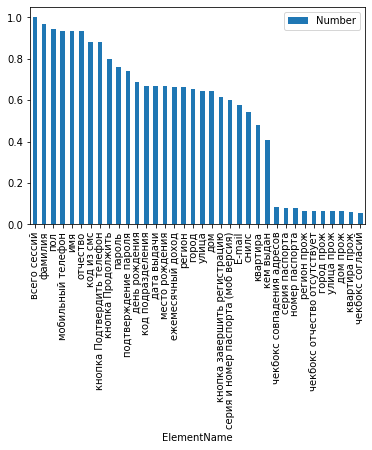

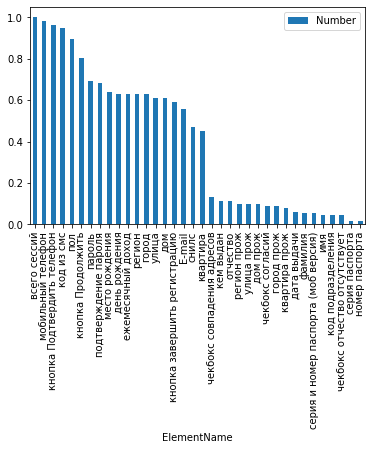

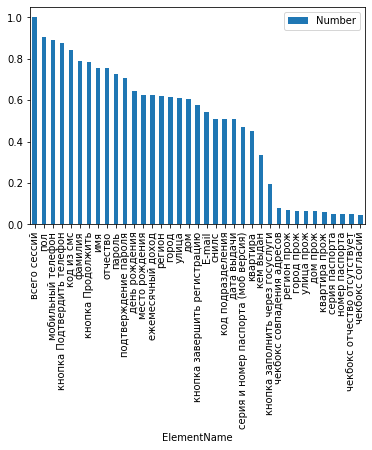

In [13]:
for file in os.listdir(os.path.join(os.getcwd(), 'data')):
    print(file)
    df = pd.read_csv(os.path.join(os.getcwd(), 'data', file), sep=None, encoding='utf8', engine='python')
    # общее число пользователей
    num_users = len(df["IP"].unique())
    print('Число пользователей:', num_users)
    # общее число сессий
    num_sessions = len(df["Session"].unique())
    print('Число сессий:', num_sessions)
    print('Отношение числа сессий к числу уникальных пользователей: {:.3}'.format(num_sessions/num_users))
    result = post_prod(analyze_set(df))
    result.plot(x="ElementName", kind='bar')
    result.to_csv(file)
    plt.savefig(file.replace('csv', 'png'), dpi=300, bbox_inches='tight')

In [7]:
# Результат для случая f
dff = pd.read_csv('df_f.csv', encoding='utf8', engine='python')
dff

,Unnamed: 0,ElementName,Number
0,35,всего сессий,1.000000
1,4,фамилия,0.965473
2,34,пол,0.945144
3,7,мобильный телефон,0.934818
4,5,имя,0.933850
5,6,отчество,0.932882
6,8,код из смс,0.882543
7,9,кнопка Подтвердить телефон,0.880284
8,10,кнопка Продолжить,0.800904
9,11,пароль,0.760568


In [8]:
# Результат для случая g
dfg = pd.read_csv('df_g.csv', encoding='utf8', engine='python')
dfg

,Unnamed: 0,ElementName,Number
0,35,всего сессий,1.000000
1,0,мобильный телефон,0.982301
2,1,кнопка Подтвердить телефон,0.964602
3,2,код из смс,0.946903
4,34,пол,0.893805
5,3,кнопка Продолжить,0.805310
6,6,пароль,0.690265
7,7,подтверждение пароля,0.681416
8,9,место рождения,0.637168
9,8,день рождения,0.628319


In [9]:
# Результат для случая h
dfh = pd.read_csv('df_h.csv', encoding='utf8', engine='python')
dfh

,Unnamed: 0,ElementName,Number
0,36,всего сессий,1.000000
1,35,пол,0.902808
2,3,мобильный телефон,0.888229
3,6,кнопка Подтвердить телефон,0.874190
4,4,код из смс,0.842873
5,23,фамилия,0.791577
6,5,кнопка Продолжить,0.783477
7,24,имя,0.756479
8,2,отчество,0.755940
9,8,пароль,0.726782


Рассмотрим стратегию f. Данный способ охарактеризован самым большим набором данных из предоставленных. Из всех трёх способов он демонстрирует самое высокое отношение числа уникальных пользователей к числу сессий, что говорит о том, что люди зачастую проходят регистрацию не с первого раза. Этот факт может свидетельствовать о сложности процесса для пользователей. После этапа подтверждения номера телефона начинается резкое сужение воронки, которое останавливается на этапе сбора паспортных данных. Стратегия f продемонстрировала самую высокую конверсию по числу успешных завершений регистрации - почти 62%. Кроме того, данная воронка, пожалуй, является наиболее широкой.

Стратегия g представлена всего 113 сессиями, что не позволяет охарактеризовать её с высокой степенью достоверности. Судя по имеющейся выборке, стратегия продемонстрировала самый высокий процент людей, оставивших номер телефона. Итоговая конверсия по числу завершённых регистраций - 59%. Данные результаты подлежат дополнительной проверке путём анализа большей выборки, размер которой был бы сопоставим с другими представленными наборами данных.

Стратегия h имеет самый низкий процент людей, дошедших до этапа подтверждения номера телефона - 84%. Данный подход также демонстрирует самое низкое значение финальной конверсии - около 58%.

Исходя из сказанного выше, стратегия f выглядит наиболее оптимальной, позволяющей собрать много информации для наибольшего числа людей. Возможно, комбинирование представленных подходов позволило бы получить более высокие результаты.

Интересные наблюдения. 

1) При заполнении полей, посвящённых адресу, воронка практически не сужается. Это может свидетельствовать о том, что люди воспринимают эти поля, как нечто целостное. Возможно, есть способ создать такое же восприятие для всей формы регистрации.

2) Низких значений параметров в правой части гистограмм не стоит воспринимать как проблему, данные области редко заполняются в связи с низкой релевантностью в большинстве случаев (например, адрес регистрации совпадает с адресом фактического проживания).